In [11]:
import mph
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
client = mph.start()
model = client.load("comsol/beam.mph")

In [3]:
model.parameters()

{'Youngs': 'YoungsTheo',
 'density': '0.65*densityTheo',
 'F0': '1 [N]',
 'damping': '0.9*dampingTheo',
 'YoungsTheo': '10e10 [Pa]',
 'densityTheo': '8.34e3 [kg/m^3]',
 'dampingTheo': '0.01'}

In [13]:
model.parameters()
def updateParam(model, young=10e10, rho=8.34e3, eta=0.01):
    model.parameter('Youngs', str(young)+' [Pa]')
    model.parameter('density', str(rho)+' [kg/m^3]')
    model.parameter('damping', str(eta)+' [Pa]')

updateParam(model, young=0.987*10e10, rho=1.01*8.34e3, eta=1.1239*0.01)
model.parameters()

{'Youngs': '98700000000.0 [Pa]',
 'density': '8423.4 [kg/m^3]',
 'F0': '1 [N]',
 'damping': '0.011238999999999999 [Pa]',
 'YoungsTheo': '10e10 [Pa]',
 'densityTheo': '8.34e3 [kg/m^3]',
 'dampingTheo': '0.01'}

In [8]:
model.solve("Study 3")

KeyboardInterrupt: 

In [6]:
a = model.evaluate('comp1.point1')
model.parameters()

{'Youngs': '98700000000.0 [Pa]',
 'density': '8423.4 [kg/m^3]',
 'F0': '1 [N]',
 'freq': '2906 [Hz]',
 'damping': '0.011238999999999999 [Pa]',
 'YoungsTheo': '10e10 [Pa]',
 'densityTheo': '8.34e3 [kg/m^3]',
 'dampingTheo': '0.01'}

In [12]:
# range of values used for the comsol studio
a
# range of values used for the comsol studio
# range(10, 10, 470) range(470, 1, 520) range(520, 5, 600) range(600, 1,700) range(700, 10,1350) range(1350,1, 1390) range(1390,20,1570) range(1570,1,1630) range(1630,100,2650) range(2650,1,2750) range(2750, 20 ,2950) range(2950, 1, 3050)

array([0.02001205+5.63099856e-06j, 0.01939547+5.80318762e-06j,
       0.0187959 +5.97993162e-06j, ..., 0.00170881+4.39199204e-06j,
       0.00170534+4.39945662e-06j, 0.00170186+4.40696304e-06j])

/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(50, 3000)

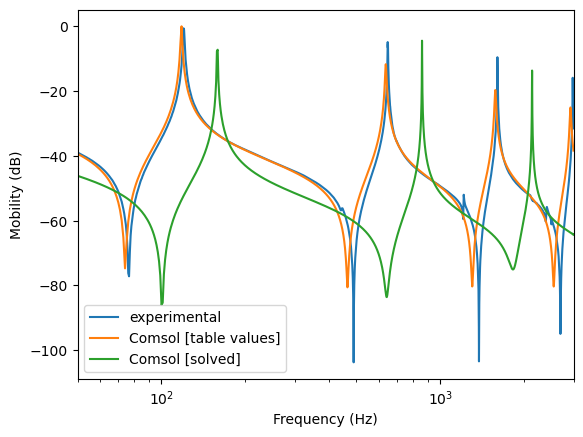

In [14]:
import numpy as np
import pandas as pd

def beamProperties():
        beam = {"length": 0.301,
            "width": 0.026,
            "thickness": 0.003,
            
            "E": 10e11,
            
            "mass": 0.1877
            }

        beam["massPerUnit"] = beam["mass"] / beam["length"]
        beam["volume"] = beam["length"] * beam["width"] * beam["thickness"]
        beam["I"] = beam["width"]*beam["thickness"]**3/12
        return beam

def mobilityFuncModelx(E, freq, rho=8.4e-3, eta=0.007):
    """
    Calculates the mobility value based on the Young's modulus(E) and the frequency
    Input: 
        E   : Young's modulus
        eta : loss factor
    Output: 
        Y   : Mobility value
    """
    l = beam["length"]/2

    # calculating the bending wave number
    w = 2*np.pi*freq # Angular frequency
    B = E*beam["I"] #
    complex_B = E*(1+1j*eta)*beam["I"]
    massPerUnit = rho*beam["thickness"]*beam["width"]
    cb = np.sqrt(w)*(B/massPerUnit)**(1/4) # bending wave velocity
    
    kl = w/(cb)*l # bending wave number
    complex_kl = kl*(1-1j*eta/4)
    N_l = np.cos(complex_kl)*np.cosh(complex_kl) + 1
    D_l = np.cos(complex_kl)*np.sinh(complex_kl) + np.sin(complex_kl)*np.cosh(complex_kl)

    Y = -(1j*l)/ (2*complex_kl*np.sqrt(complex_B *massPerUnit)) * N_l/D_l
    return abs(Y)

freq = np.linspace(50, 3000, 2951)
plt.xlabel("frequency / Hz")
plt.ylabel("mobility / dB")

experiment = pd.read_csv("./Data/bend/centerFreqResponse.csv")[10:]
mob = experiment["force"] + 1j*experiment["velocity"]
freqExp = experiment["freq"]
beam = beamProperties()
comsolInit = mobilityFuncModelx(1e11, freq, rho = 8.34e3, eta = 0.01)
updateParam(model, young=4.98*1e11, rho=2.56*8976, eta=1.05*0.01)
model.solve("Study 3")
comsolSol = abs(model.evaluate('comp1.point1'))
plt.plot(freqExp, 20*np.log10(mob), label="experimental")
plt.semilogx(freq, 20*np.log10(abs(comsolInit)), label="Comsol [table values]")
plt.semilogx(freq, 20*np.log10(abs(comsolSol)), label="Comsol [solved]")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Mobility (dB)")
plt.legend()
plt.xlim([50, 3000])

(50, 3000)

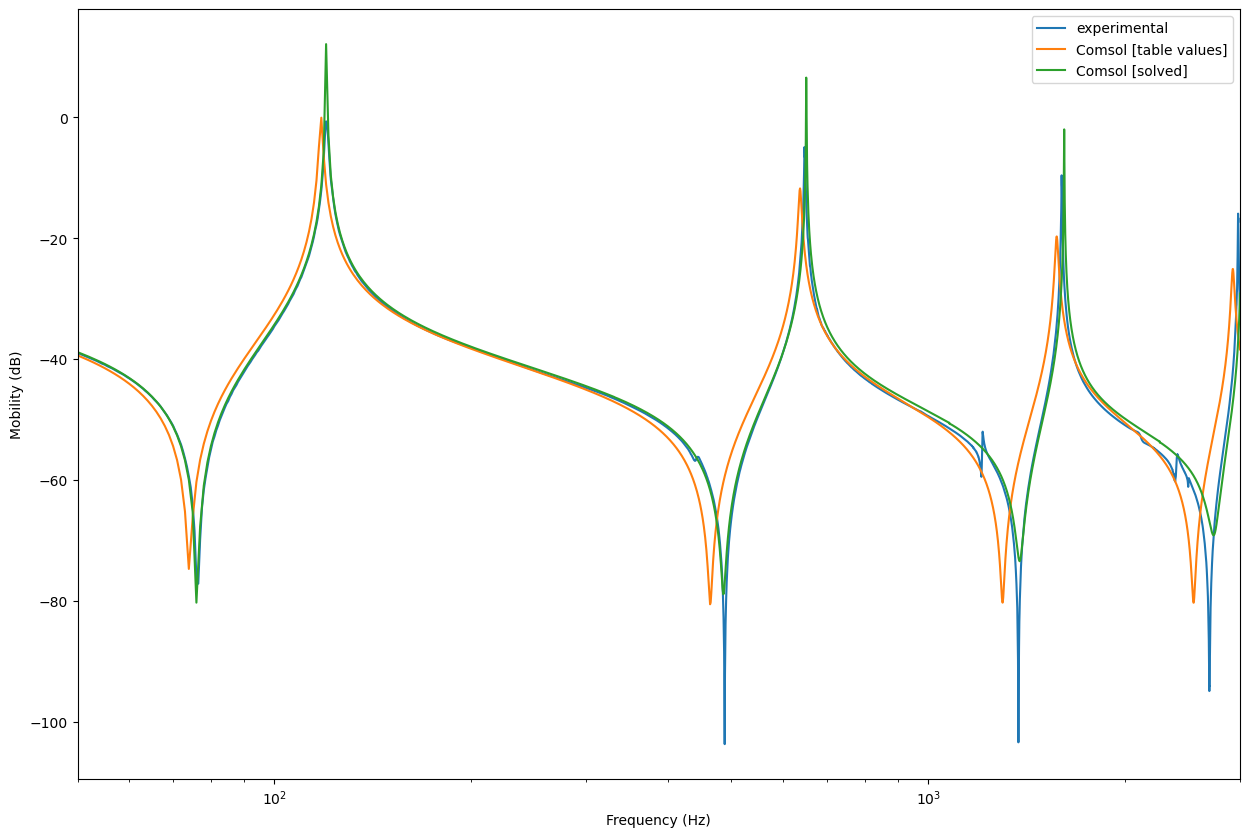

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(freqExp, 20*np.log10(mob), label="experimental")
plt.semilogx(freq, 20*np.log10(abs(comsolInit)), label="Comsol [table values]")
plt.semilogx(freq, 20*np.log10(abs(comsolSol)), label="Comsol [solved]")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Mobility (dB)")
plt.legend()
plt.xlim([50, 3000])

In [14]:
root = folder/'multiphysics'
architectures = {                      # valid system architecture names
    'Windows': ['win64'],
    'Linux':   ['glnxa64'],
    'Darwin':  ['maci64'],
}

In [17]:
for arch in architectures['Darwin']:
            comsol = root/'bin'/arch/'comsol'
            if comsol.is_file():
                print("here")
                break

In [7]:
np.linspace(50, 1, 3000)

array([50.        , 49.98366122, 49.96732244, ...,  1.03267756,
        1.01633878,  1.        ])

In [9]:

experiment = pd.read_csv("./Data/bend/centerFreqResponse.csv")[10:]
mob = experiment["force"] + 1j*experiment["velocity"]
freqExp = experiment["freq"]
updateParam(model, young=10e10*0.9799, rho=0.9799*8976, eta=0.9891*0.01)
model.solve("Study 3")
model.parameters()
comsolSol = abs(model.evaluate('comp1.point1'))

In [12]:
updateParam(model, young=10e10, rho=8976, eta=0.01)
print(model.parameters())
model.solve("Study 3")
comsolInit = abs(model.evaluate('comp1.point1'))

{'Youngs': '100000000000.0 [Pa]', 'density': '8976 [kg/m^3]', 'F0': '1 [N]', 'damping': '0.01 [Pa]', 'YoungsTheo': '10e10 [Pa]', 'densityTheo': '8.34e3 [kg/m^3]', 'dampingTheo': '0.01'}


In [14]:
updateParam(model, young=12e10, rho=8976, eta=0.01)
print(model.parameters())
model.solve("Study 3")
comsolRandom = abs(model.evaluate('comp1.point1'))

{'Youngs': '120000000000.0 [Pa]', 'density': '8976 [kg/m^3]', 'F0': '1 [N]', 'damping': '0.01 [Pa]', 'YoungsTheo': '10e10 [Pa]', 'densityTheo': '8.34e3 [kg/m^3]', 'dampingTheo': '0.01'}


(50, 3000)

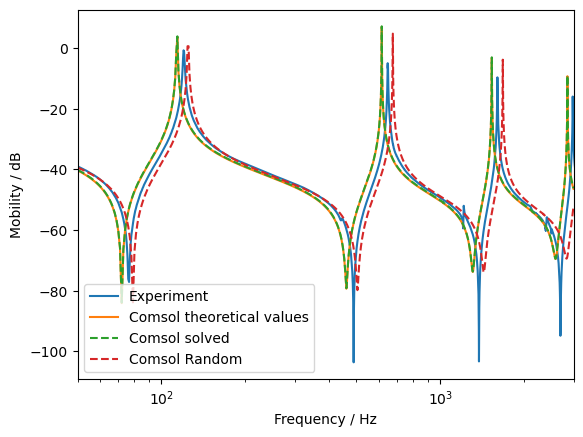

In [17]:
import numpy as np
freq = np.linspace(50, 3000, 2951)
plt.semilogx(freqExp, 20*np.log10(abs(mob)), label="Experiment")
plt.semilogx(freq, 20*np.log10(abs(comsolInit)), label="Comsol theoretical values")
plt.semilogx(freq, 20*np.log10(abs(comsolSol)), "--", label="Comsol solved")
plt.semilogx(freq, 20*np.log10(abs(comsolRandom)), "--", label="Comsol Random")
plt.xlabel("Frequency / Hz")
plt.ylabel("Mobility / dB")
plt.legend()
plt.xlim([50, 3000])

In [10]:
model.parameters()

{'Youngs': '97990000000.0 [Pa]',
 'density': '8795.5824 [kg/m^3]',
 'F0': '1 [N]',
 'damping': '0.009891 [Pa]',
 'YoungsTheo': '10e10 [Pa]',
 'densityTheo': '8.34e3 [kg/m^3]',
 'dampingTheo': '0.01'}

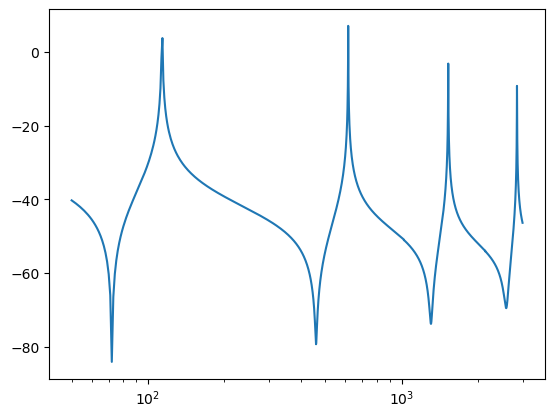

In [20]:

plt.semilogx(freq, 20*np.log10(abs(comsolInit)), label="Comsol initial")

In [16]:
9e10


90000000000.0